In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/thailand-fatal-road-accident/thailand_fatal_raod_accident_2011_2022.parquet
/kaggle/input/thailand-fatal-road-accident/thailand_fatal_raod_accident_2011_2022.csv


In [2]:
# All data
df = pd.read_csv("/kaggle/input/thailand-fatal-road-accident/thailand_fatal_raod_accident_2011_2022.csv")
df.tail()

/tmp/ipykernel_20/92544447.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/thailand-fatal-road-accident/thailand_fatal_raod_accident_2011_2022.csv")


,accident_date,official_death_date,age,gender,nationality,accident_cause_code,accident_cause,vehicle_type,province_th,district_th,sub_district_th,province_en,district_en,sub_district_en,latitude,longitude
240919,NaN,2022-01-03,30.0,Male,Unknown,Unknown,Unknown,unidentified,นครราชสีมา,ไม่ระบุ,ไม่ระบุ,Nakhon Ratchasima,Unknown,Unknown,15.057413,102.347003
240920,NaN,2022-01-03,74.0,Female,Unknown,Unknown,Unknown,tricycle,อุดรธานี,ไม่ระบุ,ไม่ระบุ,Udon Thani,Unknown,Unknown,17.682571,103.193136
240921,NaN,2022-01-02,43.0,Female,Unknown,Unknown,Unknown,moterbike,จันทบุรี,ไม่ระบุ,ไม่ระบุ,Chanthaburi,Unknown,Unknown,12.505357,102.155707
240922,NaN,2022-01-01,NaN,Male,Unknown,Unknown,Unknown,unidentified,เพชรบูรณ์,ไม่ระบุ,ไม่ระบุ,Phetchabun,Unknown,Unknown,15.610476,101.061989
240923,NaN,2022-01-01,34.0,Female,Unknown,Unknown,Unknown,small_truck_or_van,นครราชสีมา,ไม่ระบุ,ไม่ระบุ,Nakhon Ratchasima,Unknown,Unknown,15.509395,102.683963


In [3]:
# Check datatype and shape
print(f"Chech Datatype\n{df.dtypes}")
print("\nShape check")
print(df.shape)

print()
print((df.isnull().sum()))

df["official_death_date"] = pd.to_datetime(df["official_death_date"])

Chech Datatype
accident_date           object
official_death_date     object
age                    float64
gender                  object
nationality             object
accident_cause_code     object
accident_cause          object
vehicle_type            object
province_th             object
district_th             object
sub_district_th         object
province_en             object
district_en             object
sub_district_en         object
latitude               float64
longitude              float64
dtype: object

Shape check
(240924, 16)

accident_date          133974
official_death_date         0
age                     29814
gender                      0
nationality                 0
accident_cause_code         0
accident_cause              0
vehicle_type                0
province_th                 0
district_th                 0
sub_district_th             0
province_en                 0
district_en                 0
sub_district_en             0
latitude                    

In [4]:
# df[df["accident_date"].isnull()]

# Remove NaN accident_date
thai_accident_df = df.dropna(subset="accident_date").copy()
print(thai_accident_df.shape)
# print(thai_accident_df.tail())

(106950, 16)


In [5]:
# Change data type of accident_date
thai_accident_df["accident_date"] = pd.to_datetime(thai_accident_df["accident_date"])

thai_accident_df.dtypes

accident_date          datetime64[ns]
official_death_date    datetime64[ns]
age                           float64
gender                         object
nationality                    object
accident_cause_code            object
accident_cause                 object
vehicle_type                   object
province_th                    object
district_th                    object
sub_district_th                object
province_en                    object
district_en                    object
sub_district_en                object
latitude                      float64
longitude                     float64
dtype: object

In [6]:
# print(thai_accident_df["accident_date"].dt.date.value_counts())
print(thai_accident_df.isnull().sum())

(thai_accident_df.describe().T)

accident_date              0
official_death_date        0
age                    11307
gender                     0
nationality                0
accident_cause_code        0
accident_cause             0
vehicle_type               0
province_th                0
district_th                0
sub_district_th            0
province_en                0
district_en                0
sub_district_en            0
latitude                   0
longitude                  0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
age,95643.0,37.821210,20.533372,-1.000000,21.000000,35.000000,53.000000,149.000000
latitude,106950.0,14.505021,3.036799,-74.389096,13.602259,14.649965,16.441783,23.822144
longitude,106950.0,101.045485,3.028178,-92.511648,99.985578,100.669064,102.099891,105.599818


# **Data idea**
Will try to create
* Line chart 
    * to show how the number of accidents has changed over time.
* Bar chart

* Hist plot
    * for 
    

Pie chart - by gender, province    

Ideas .....

BIG to small

Simple number



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# copy data that drop NaN data from accident_date
thai_accident_df = df.dropna(subset="accident_date").copy()
# Convert to datetime format
thai_accident_df["accident_date"] = pd.to_datetime(thai_accident_df["accident_date"])

# Create new columns year, month, day
thai_accident_df["year"], thai_accident_df["month"], thai_accident_df["day"] =  thai_accident_df["accident_date"].dt.year, thai_accident_df["accident_date"].dt.month, thai_accident_df["accident_date"].dt.day

def thai_accident_from_to(from_date=thai_accident_df["accident_date"].min(), to_date=thai_accident_df["accident_date"].max()):
    df = thai_accident_df[(thai_accident_df["accident_date"] >= from_date) & (thai_accident_df["accident_date"] < to_date)]
    return df

print("Ready for Data visualization")

Ready for Data visualization


     year  month  count
139  2021      8    527
140  2021      9    511
141  2021     10    578
142  2021     11    705
143  2021     12    865


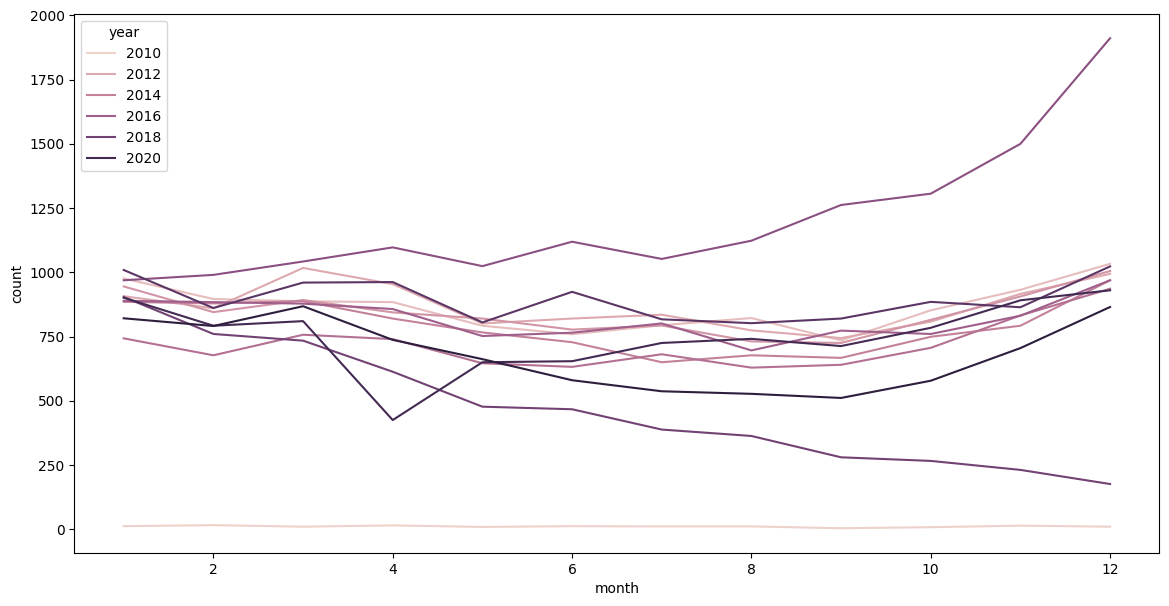

In [8]:
# Make a new dataframe by grouping to year and month
counts = thai_accident_df.groupby(['year', 'month']).size().reset_index(name='count')
# print(thai_accident_df.head())
print(counts.tail())

plt.figure(figsize=(14,7))
sns.lineplot(data=counts, x="month", y="count", hue="year")
plt.show()

# plt.figure(figsize=(14,7))
# sns.histplot(data=counts, x="month", y="count", hue="year")
# plt.show()

In [9]:
print("Simple data below\n")
print(f"All accident data from {thai_accident_df['accident_date'].min().date()} to {thai_accident_df['accident_date'].max().date()} \n{thai_accident_df.shape[0]} cases\n")
# print(thai_accident_df["accident_date"].dt.year.value_counts())

print("# By Gender")
gender_count = thai_accident_df["gender"].value_counts().reset_index()
gender_count.columns = ["gender", "g_count"]

# calculate percentage
gender_count["%"] = (gender_count["g_count"]/gender_count["g_count"].sum())*100
print(gender_count)

print("\n# By Vehicle type")
print(thai_accident_df["vehicle_type"].value_counts())

print("\n# By province")
print(thai_accident_df["province_en"].value_counts())
print(thai_accident_df["province_en"].value_counts().describe())

Simple data below

All accident data from 2010-01-03 to 2021-12-31 
106950 cases

# By Gender
    gender  g_count          %
0     Male    80174  74.964002
1   Female    21739  20.326321
2  Unknown     5037   4.709677

# By Vehicle type
moterbike               60383
unidentified            38006
car                      4659
pedestrian               1949
small_truck_or_van       1386
hevay_truck               200
bike                      188
tricycle                   72
agricultural_vehicle       69
bus                        38
Name: vehicle_type, dtype: int64

# By province
Bangkok              6243
Chon Buri            4425
Nakhon Ratchasima    4206
Chiang Mai           3440
Ubon Ratchathani     2964
                     ... 
Satun                 333
Samut Songkhram       269
Mae Hong Son          257
Ranong                252
unknown                 5
Name: province_en, Length: 78, dtype: int64
count      78.000000
mean     1371.153846
std      1013.080324
min         5.000000
2

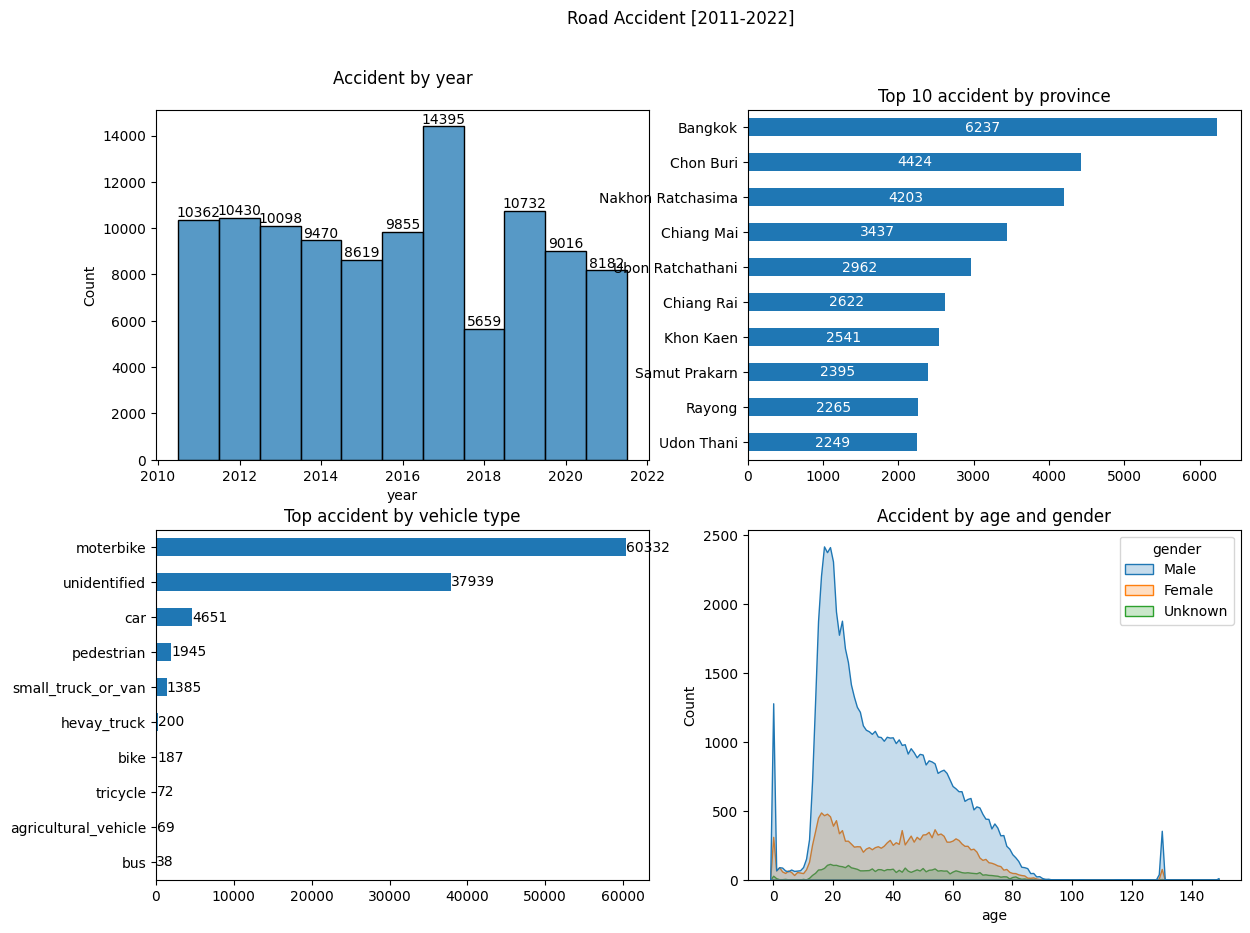

In [10]:
this_data = thai_accident_from_to("2011-01-01", "2022-12-31")

fig, ax = plt.subplots(2,2, figsize=(14,10))
fig.suptitle("Road Accident [2011-2022]")



# 00
sns.histplot(ax=ax[0,0], x=this_data["year"], discrete=True)
ax[0,0].set_title("Accident by year", y=1.05)
ax[0,0].bar_label(ax[0,0].containers[1])



# 01

this_data["province_en"].value_counts()[:10].sort_values().plot(kind="barh", ax=ax[0,1])
ax[0,1].set_title("Top 10 accident by province")
ax[0,1].bar_label(ax[0,1].containers[0], label_type="center", color="white")


# 10


this_data["vehicle_type"].value_counts().sort_values().plot(kind="barh", ax=ax[1,0])
ax[1,0].set_title("Top accident by vehicle type")
ax[1,0].bar_label(ax[1,0].containers[0])



# 11

ax[1,1] = sns.histplot(data=this_data, x="age",hue="gender", element="poly",discrete=True)
ax[1,1].set_title("Accident by age and gender")




plt.show()

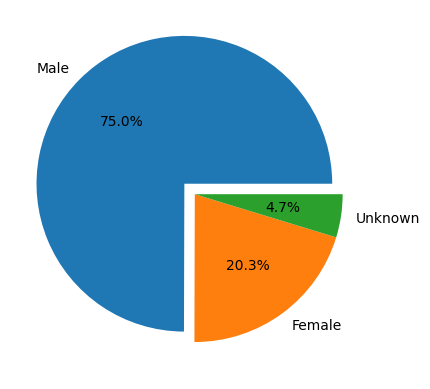

,index,gender
0,Male,80068
1,Female,21714
2,Unknown,5036


In [11]:
gender_df = this_data["gender"].value_counts().reset_index()

plt.pie(gender_df["gender"], labels=gender_df["index"], autopct='%1.1f%%',explode=(0.1, 0, 0))

plt.show()

gender_df

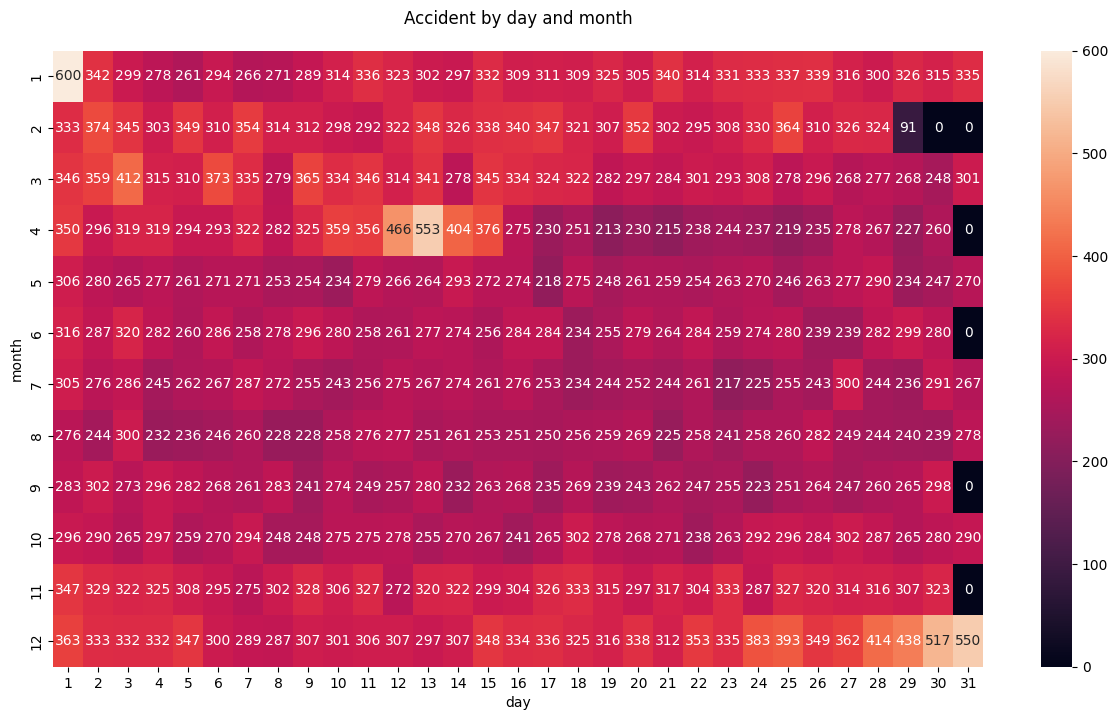

In [12]:

heat_group = this_data.groupby(["month","day"]).size().reset_index(name="count")
heat = heat_group.pivot_table(index="month", columns="day", values="count", fill_value=0)


fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(heat,annot=True, ax=ax, fmt=".3g")
ax.set_title("Accident by day and month", y=1.03)

plt.show()

# Test DV start below


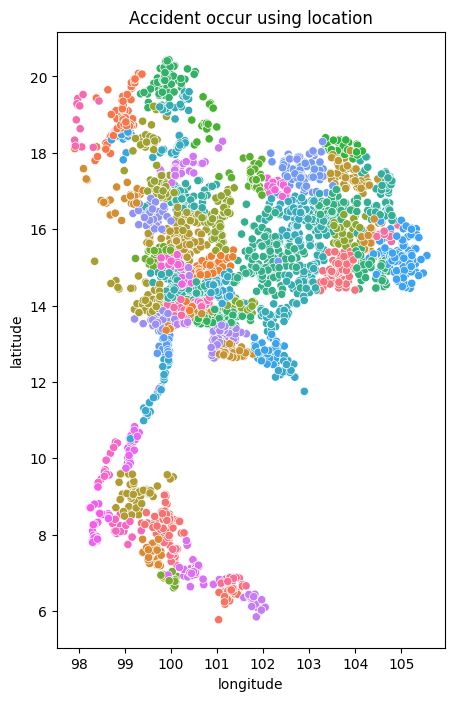

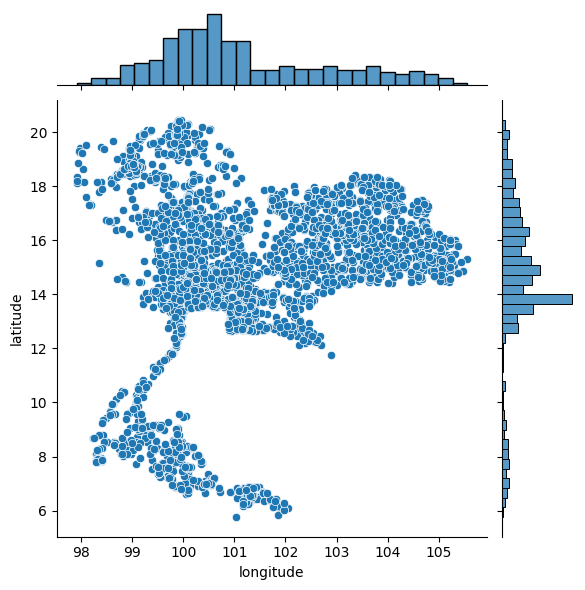

In [13]:
# "Try to plot location using scatterplot"
df_2021 = thai_accident_from_to("2021-01-01", "2021-05-31")

location_df = df_2021[["latitude", "longitude", "gender", "province_en"]]
# print(location_df.head())

fig, ax = plt.subplots(figsize=(5,8))
ax.set_title("Accident occur using location")
sns.scatterplot(data=location_df, y="latitude", x="longitude", ax = ax,hue="province_en",legend=None)
plt.show()


# Try jointplot
sns.jointplot(data=location_df, y="latitude", x="longitude")
plt.show()

NameError: name 'year_df' is not defined

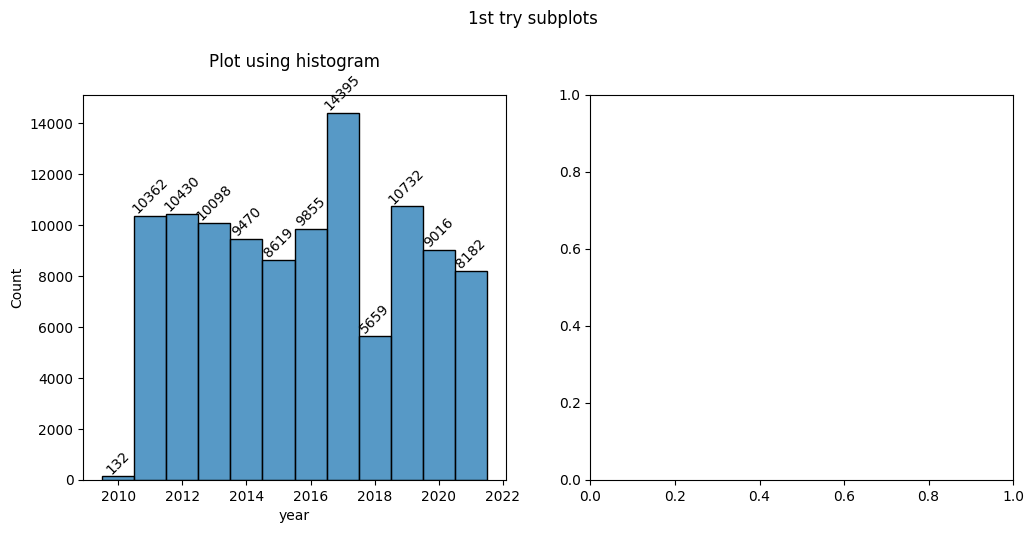

In [14]:
# "Try......"

fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("1st try subplots", y=1.05)
# ax 0
sns.histplot(ax=ax[0], x=thai_accident_df["year"], discrete=True)
ax[0].set_title("Plot using histogram", y=1.05)
ax[0].bar_label(ax[0].containers[1], rotation=45)

# ax 1
sns.barplot(ax=ax[1], data=year_df, x="year", y="count")
ax[1].set_title("Plot using barplot", y=1.05)
ax[1].bar_label(ax[1].containers[0], rotation=35)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
plt.show()




# "Try subplots"

fig, ax = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Accident by age")

# 1
sns.histplot(ax=ax[0], x=thai_accident_df["age"])
ax[0].set_title("barplot by age")
# 2
sns.histplot(ax=ax[1], data=thai_accident_df, x="age", discrete=True, hue="gender", element="poly")
ax[1].set_title("histplot by age and gender")

plt.show()

In [ ]:
# Try combine plot

df_11_21 = thai_accident_from_to("2011-01-01", "2021-12-31")
plt.figure()
sns.histplot(x=df_11_21["accident_date"], hue=df_11_21["gender"],kde=True)
# sns.histplot(x=df_11_21["accident_date"], hue=df_11_21["gender"],element="poly")
plt.show()

fig, ax = plt.subplots()
ax2 = ax.twiny()
sns.histplot(x=df_11_21["accident_date"], hue=df_11_21["gender"],element="poly", ax=ax)
sns.histplot(data=df_11_21, x ="age", hue=df_11_21["gender"], ax=ax2)
plt.show()

In [ ]:
df3 = thai_accident_from_to("2020-01-01", "2021-12-31")
df3_group = df3.groupby(["month","day"]).size().reset_index(name="count")
heat = df3_group.pivot_table(index="month", columns="day", values="count", fill_value=0)


# df3_group.head()
# print(df3.shape)
# print(df3_group["count"].sum())
# print(df3_group.tail())

# print(heat)


fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(heat,annot=True, ax=ax)

plt.show()

In [ ]:
df4 = thai_accident_from_to("2020-01-01", "2021-12-31")

pivot2 = df4.pivot_table(index="month", columns="day", aggfunc='size', fill_value=0)

fig, ax = plt.subplots()
sns.heatmap(pivot2, ax=ax)
plt.show()

In [ ]:
df5 = thai_accident_from_to("2020-01-01", "2021-12-31")
df5["day_name"] = df5["accident_date"].dt.day_name()
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pivot5 = df5.pivot_table(index="month", columns="day_name", aggfunc='size', fill_value=0)

fig, ax = plt.subplots()
sns.heatmap(pivot5, ax=ax)
plt.show()

In [ ]:
df6 = thai_accident_from_to("2020-01-01", "2021-12-31")
gender_df = df6["gender"].value_counts().reset_index()

# print(gender_df)

fig, ax = plt.subplots(2,2, figsize=(14,5))
# ax[0] = plt.pie(gender_df["gender"],labels=gender_df["index"])
sns.barplot(data=gender_df, x="index", y="gender", ax=ax[0,0])
plt.show()



##############

# ax[1] = plt.pie(df6["gender"].value_counts(), labels=df6["gender"].value_counts().index)
# ax[1] = fig.add_subplot()
# ax[1,0].pie(df6["gender"].value_counts(), labels=df6["gender"].value_counts().index)
plt.pie(gender_df["gender"], labels=gender_df["index"], autopct='%1.1f%%',explode=(0.1, 0, 0))


plt.show()


In [ ]:
this_data = thai_accident_from_to("2015-01-01", "2021-05-31")

fig, ax = plt.subplots(2,2, figsize=(14,10))
fig.suptitle("Road Accident [2011-2022]")



# 00
sns.histplot(ax=ax[0,0], x=this_data["year"], discrete=True)
ax[0,0].set_title("Accident by year", y=1.05)
ax[0,0].bar_label(ax[0,0].containers[1], rotation=45)



# 01

this_data["province_en"].value_counts()[:10].sort_values().plot(kind="barh", ax=ax[0,1])
ax[0,1].set_title("Top 10 accident by province")
ax[0,1].bar_label(ax[0,1].containers[0], label_type="center", color="white")


# 10


this_data["vehicle_type"].value_counts().sort_values().plot(kind="barh", ax=ax[1,0])
ax[1,0].set_title("Top accident by vehicle type")
ax[1,0].bar_label(ax[1,0].containers[0])



# 11

ax[1,1] = sns.histplot(data=this_data, x="age",hue="gender", element="poly",discrete=True)
ax[1,1].set_title("Age and gender plot")




plt.show()